In [63]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [65]:
data_dir

'.\\datasets\\flower_photos'

In [66]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [67]:
list(data_dir.glob('*/*.jpg'))[:5]  # List first 5 images

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [68]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [69]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

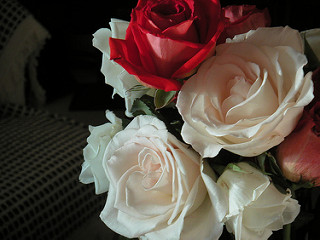

In [70]:
PIL.Image.open(str(roses[1]))

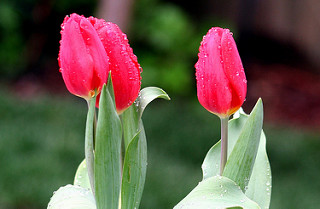

In [71]:
import PIL.Image


tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


Read flowers images from disk into numpy array using opencv

In [72]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [73]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [74]:

flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [75]:

str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [76]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [77]:

img.shape

(240, 179, 3)

In [78]:

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [79]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [80]:
X = np.array(X)
y = np.array(y)

Train test split

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Prepprocessing : scale images

In [82]:
X_train_scaled= X_train / 255.0
X_test_scaled = X_test / 255.0

CNN

In [83]:
num_classes = 5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.3724 - loss: 1.5566
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.5920 - loss: 1.0260
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.6790 - loss: 0.8318
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.7713 - loss: 0.6245
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8480 - loss: 0.4433
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.9127 - loss: 0.2776
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.9542 - loss: 0.1604
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9754 - loss: 0.0852
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9855 - loss: 0.0563
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9885 - loss: 0.0444
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.9947 - loss: 0.0293
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10

In [84]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6433 - loss: 2.5581


[2.4903969764709473, 0.6361655592918396]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [85]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([[  3.5540714 ,  14.916972  ,   0.9101979 , -12.874705  ,
         -9.025907  ],
       [  6.0219293 ,   0.6073482 ,  -5.972688  ,  -8.678348  ,
          0.33404782],
       [ -2.523747  ,   4.4177647 ,  15.607639  ,  -6.1921763 ,
         -6.2835536 ],
       ...,
       [ -4.2946734 , -12.671267  ,  -9.368769  ,   9.544328  ,
          6.933348  ],
       [  0.15677513,   9.224099  ,  -1.8401134 , -11.463937  ,
         -3.1872575 ],
       [ -3.3533196 , -11.314915  ,  -2.0949764 ,   6.826864  ,
          4.9415407 ]], dtype=float32)

In [86]:

score = tf.nn.softmax(predictions[0])

In [87]:
np.argmax(score)

np.int64(1)

In [ ]:
y_test[0]

np.int64(1)


Improve Test Accuracy Using Data Augmentation

In [89]:
from tensorflow import keras
from tensorflow.keras import layers

# Define image dimensions
img_height = 180
img_width = 180

# Data augmentation pipeline
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


c:\Users\SUBHRADIP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


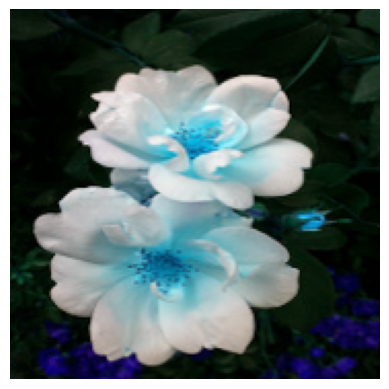

In [90]:

plt.axis('off')
plt.imshow(X[0])


Newly generated training sample using data augmentation

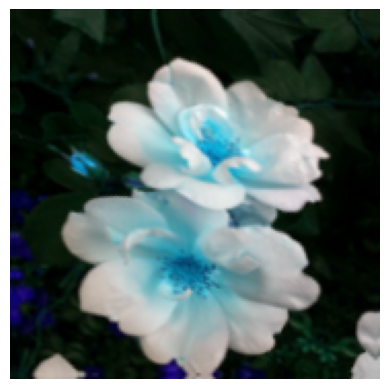

In [91]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


Train the model using data augmentation and a drop out layer

In [92]:
num_classes=5
mmodel=Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'],
              )

model.fit(X_train_scaled,y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.9918 - loss: 0.0232
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.9959 - loss: 0.0156
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9985 - loss: 0.0060
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - accuracy: 0.9985 - loss: 0.0098
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.9998 - loss: 0.0013
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9996 - loss: 0.0031
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9991 - loss: 0.0033
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.9999 - loss: 9.5605e-04
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9955 - loss: 0.0158
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9620 - loss: 0.1276
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9947 - loss: 0.0216
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━

In [93]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6513 - loss: 2.7293


[2.6403868198394775, 0.6514161229133606]